
 Accuracy      : 93.33 %
 Precision     : 93.33 %
 Recall        : 93.33 %
 F1 Score      : 93.33 %

 Correct Predictions : 28
 Wrong Predictions   : 2

 Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.88      0.88      0.88         8
   virginica       0.93      0.93      0.93        15

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



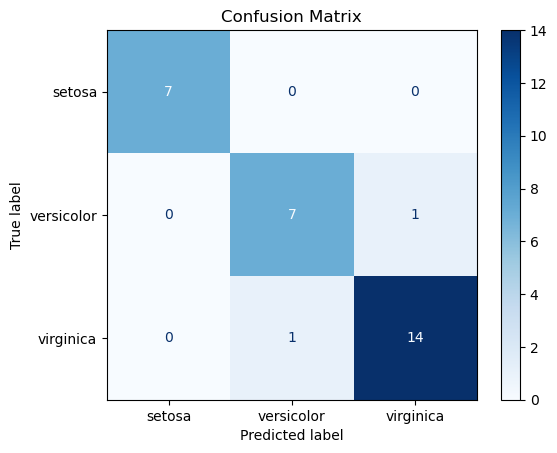

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, accuracy_score,
    precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt

# Load the dataset
irisData = load_iris()
X = irisData.data
y = irisData.target

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=435)

# KNN with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Correct/Wrong Predictions
correct = sum(y_pred == y_test)
wrong = sum(y_pred != y_test)

# Print Results
print(f"\n Accuracy      : {round(accuracy * 100, 2)} %")
print(f" Precision     : {round(precision * 100, 2)} %")
print(f" Recall        : {round(recall * 100, 2)} %")
print(f" F1 Score      : {round(f1 * 100, 2)} %")

print(f"\n Correct Predictions : {correct}")
print(f" Wrong Predictions   : {wrong}")

# Classification report
print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=irisData.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=irisData.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()